## 선형대수
벡터 공간, 벡터, 선형 변환, 행렬, 연립 선형 방정식 등을 연구하는 대수학의 한 분야

함수와 임의의 수에 대해 아래와 같은 식이 성립할 때 **함수는 선형**이라고한다
1. f(kp) = kf(p)
2. f(p+q) = f(p) + f(q) <br><br>


* 선형함수 <br>
정비례함수(y = mx), 치환, 확대, 축소 <br>
* 비선형함수 <br>
삼각함수, 지수, 로그 함수 <br> <br>
**선형함수**는 **행렬**로 표현 가능 ↔ **행렬**로 **선형함수**를 표현가능 <br> <br>

### 벡터
수의 순서쌍 <br>
크기와 **방향**을 가진다 <br>
두 벡터가 같다 = 동일한 순서, 동일한 숫자값이 쌍을 이루고 있다면 같다 <br> <br>

* 영벡터 <br>
벡터 덧셈의 항등원 <br>
3차원 0벡터 = (0, 0, 0) <br> <br>

* 벡터의 내적 <br>
각 요소의 곱의 합 <br>
(2, 3, 5)(500, 1000, 200) = 2\*500 + 3\*1000 + 5\*200 <br>
a, b 내적이 0이라면 직교 a⊥b <br> <br>

* 벡터의 크기 <br>
$|a|$ = aa <br>

* 벡터와 함수 <br>
이차 함수, 3차원 벡터 사이의 공통점 <br>


### 행렬
행 벡터, 열 벡터

* 단위 행렬
곱셈의 항등원 = 1 → a \* 1 = a <br>
행렬 곱셍의 항등원, E 나 I로 표현 <br>
AE = EA = A <br><br>

* 역행렬 <br>
서로 곱해서 단위 행렬이 될 때, 한 행렬을 다른 행렬의 역행렬이 된다고 정의 <br>
주어진 행렬의 곱셈의 역원 <br>
a에 대해, <br>
ax = xa = 1, x를 a의 역수라고 하고 x = a<sup>-1</sup> <br>
행렬 A에 대해,  <br>
AX = XA = I, X를 A의 역행렬이라고 하고 X = A<sup>-1</sup>

In [40]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.decomposition import PCA
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})

## 차원 축소

In [4]:
# 섭취 칼로리, 아침 식사 횟수, 점심, 저녁, 운동, 체형
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])
# 칼로리, 식습관 운동습관과 그에 따른 체형 데이터
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny'] 
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [5]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [7]:
X = df[["calory", "breakfast", "lunch",	"dinner", "exercise"]]
X

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [10]:
Y = df[["body_shape"]]
Y

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


In [11]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X) # 표준화
x_std

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [15]:
# feature col → row 로 변환
print(x_std.shape)
x_std.T.shape

(10, 5)


(5, 10)

In [17]:
features = x_std.T
features

array([[-1.35205803,  0.01711466,  0.61612771, -1.18091145,  1.89972711,
        -1.26648474,  0.18826125,  1.04399418, -0.15403193,  0.18826125],
       [ 0.        ,  0.        ,  1.29099445, -1.29099445,  1.29099445,
        -1.29099445,  0.        ,  1.29099445, -1.29099445,  0.        ],
       [-1.3764944 , -0.22941573,  0.91766294, -0.22941573,  0.91766294,
        -1.3764944 , -1.3764944 ,  0.91766294,  0.91766294,  0.91766294],
       [-1.28571429,  0.14285714,  0.14285714, -1.28571429,  1.57142857,
         0.14285714,  0.14285714,  1.57142857, -1.28571429,  0.14285714],
       [ 1.        ,  0.        , -1.        ,  2.        , -1.        ,
         1.        ,  0.        , -1.        , -1.        ,  0.        ]])

In [21]:
# 공분산 행렬
print(np.cov(features).shape)
cov_matrix = np.cov(features)
cov_matrix

(5, 5)


array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [27]:
# 공분산 행렬로부터 아이겐 벡터와 아이겐 밸류 추출
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print("고유값: \n%s" % eig_vals) # 해당 행렬이 벡터에 작용하는 힘의 방향
print("고유벡터: \n%s" % eig_vecs) # 두 벡터의 닮음의 정도
# 공분산 행렬의 고육벡터는 데이터가 어느 방향으로 분산되어 있는지는 나타낸다
# 고유값은 고유 벡터에 해당하는 상관계수
# 공분산 행렬의 고유값은 각 축에 대한 공분산 값
# 고유값이 큰 순서대로 고유 벡터를 나열하면, 
# 중요한 주성분부터 추출이 된다

고유값: 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
고유벡터: 
[[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [29]:
eig_vals[0]/sum(eig_vals) 
# eig_vecs[0]으로 정사영하면 
# 5차원 → 1차원이 되는데 
# 전체 데이터의 73%를 표현할 수 있다

0.7318321731427544

In [31]:
projected_X = x_std.dot(eig_vecs.T[0])
projected_X # eig_vecs.T[0]으로 정사영한 데이터들

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [37]:
res = pd.DataFrame(projected_X, columns=["PC1"])
res["yaxis"] = 0.0
res["label"] = Y
res

,PC1,yaxis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


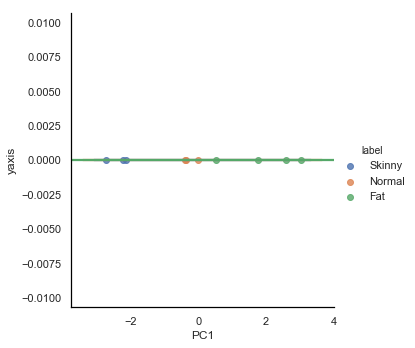

In [39]:
sns.lmplot("PC1", "yaxis", data=res, hue="label")

### Kaggle dataset 분석해보기
* [HR_comma_sep.csv](HR_comma_sep.csv)
left - 회사를 떠날지 예측

In [44]:
df = pd.read_csv("./res/HR_comma_sep.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [48]:
columns_names = df.columns.tolist()
columns_names

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

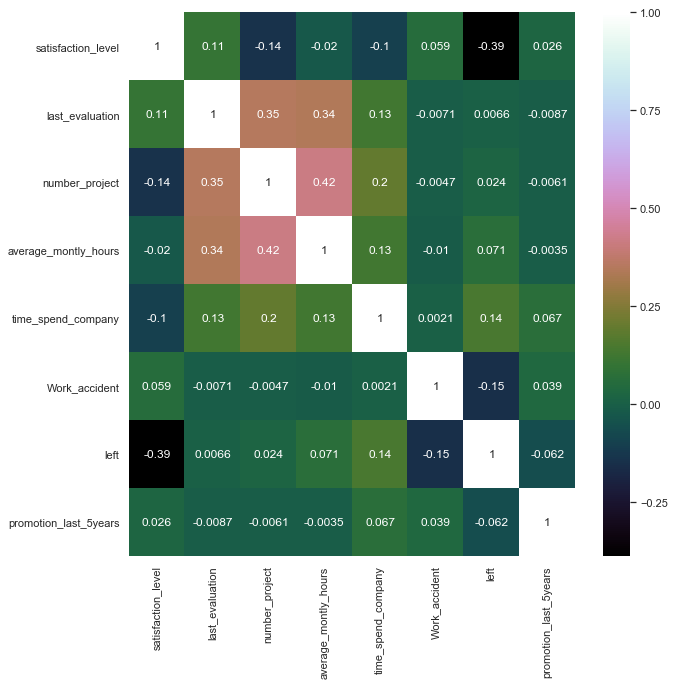

In [54]:
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cmap="cubehelix", annot=True)

In [55]:
df["sales"] # 부서

0             sales
1             sales
2             sales
3             sales
4             sales
5             sales
6             sales
7             sales
8             sales
9             sales
10            sales
11            sales
12            sales
13            sales
14            sales
15            sales
16            sales
17            sales
18            sales
19            sales
20            sales
21            sales
22            sales
23            sales
24            sales
25            sales
26            sales
27            sales
28       accounting
29       accounting
            ...    
14969         sales
14970         sales
14971         sales
14972    accounting
14973    accounting
14974    accounting
14975            hr
14976            hr
14977            hr
14978            hr
14979     technical
14980     technical
14981     technical
14982     technical
14983     technical
14984     technical
14985     technical
14986     technical
14987     technical


In [57]:
sales = df.groupby("sales").sum() # 각 부서별 column별 합
sales

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,758.46,879.55,4683,248119,4256,164,273,3
RandD,487.80,560.44,3033,158030,2650,134,121,27
accounting,446.51,550.49,2934,154292,2702,96,204,14
hr,442.52,523.84,2701,146828,2480,89,215,15
management,391.45,456.12,2432,126787,2711,103,91,69
marketing,530.76,614.23,3164,171073,3063,138,203,43
product_mng,558.91,644.71,3434,180369,3135,132,198,0
sales,2543.81,2938.23,15634,831773,14631,587,1014,100
support,1378.19,1611.81,8479,447490,7563,345,555,20


In [58]:
groupby_sales = df.groupby("sales").mean() # 각 부서별 column별 평균
groupby_sales

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [60]:
groupby_sales.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [67]:
IT= groupby_sales["satisfaction_level"].IT
RandD = groupby_sales["satisfaction_level"].RandD
accounting = groupby_sales["satisfaction_level"].accounting
hr = groupby_sales["satisfaction_level"].hr
management = groupby_sales["satisfaction_level"].management
marketing = groupby_sales["satisfaction_level"].marketing
product_mng = groupby_sales["satisfaction_level"].product_mng
sales = groupby_sales["satisfaction_level"].sales
support = groupby_sales["satisfaction_level"].support
technical = groupby_sales["satisfaction_level"].technical
technical

0.6078970588235295

In [78]:
df_drop = df.drop(labels=["sales", "salary"], axis=1)
df_drop

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
5,0.41,0.50,2,153,3,0,1,0
6,0.10,0.77,6,247,4,0,1,0
7,0.92,0.85,5,259,5,0,1,0
8,0.89,1.00,5,224,5,0,1,0
9,0.42,0.53,2,142,3,0,1,0


### column 이동

In [79]:
cols = df_drop.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [80]:
cols.index("left")

6

In [81]:
cols.insert(0, cols.pop(cols.index("left"))) # left를 빼서 0번째로 삽입해줌

In [82]:
cols

['left',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [84]:
df_drop = df_drop.reindex(columns=cols)
df_drop.columns

Index(['left', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object')

In [90]:
X = df_drop.iloc[:, 1:8].values
y = df_drop.iloc[:, 0].values
print(X, X.shape)
print(y, y.shape)

[[0.38 0.53 2.   ... 3.   0.   0.  ]
 [0.8  0.86 5.   ... 6.   0.   0.  ]
 [0.11 0.88 7.   ... 4.   0.   0.  ]
 ...
 [0.37 0.53 2.   ... 3.   0.   0.  ]
 [0.11 0.96 6.   ... 4.   0.   0.  ]
 [0.37 0.52 2.   ... 3.   0.   0.  ]] (14999, 7)
[1 1 1 ... 1 1 1] (14999,)


In [91]:
# 표준화
X_std = StandardScaler().fit_transform(X)

In [92]:
# 공분산 행렬
mean_vec = np.mean(X_std, axis=0)
mean_vec

array([ 2.88025857e-16, -3.90350833e-16,  5.58997552e-17, -8.71657200e-17,
       -6.06370226e-17,  5.30573948e-17,  0.00000000e+00])

In [93]:
cov_mat = (X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
cov_mat

array([[ 1.00006668,  0.10502822, -0.14297912, -0.02004945, -0.1008728 ,
         0.05870115,  0.02560689],
       [ 0.10502822,  1.00006668,  0.34935588,  0.33976445,  0.1315995 ,
        -0.00710476, -0.00868435],
       [-0.14297912,  0.34935588,  1.00006668,  0.41723845,  0.19679901,
        -0.00474086, -0.00606436],
       [-0.02004945,  0.33976445,  0.41723845,  1.00006668,  0.12776343,
        -0.01014356, -0.00354465],
       [-0.1008728 ,  0.1315995 ,  0.19679901,  0.12776343,  1.00006668,
         0.00212056,  0.06743742],
       [ 0.05870115, -0.00710476, -0.00474086, -0.01014356,  0.00212056,
         1.00006668,  0.03924805],
       [ 0.02560689, -0.00868435, -0.00606436, -0.00354465,  0.06743742,
         0.03924805,  1.00006668]])

In [95]:
np.cov(X_std.T)

array([[ 1.00006668,  0.10502822, -0.14297912, -0.02004945, -0.1008728 ,
         0.05870115,  0.02560689],
       [ 0.10502822,  1.00006668,  0.34935588,  0.33976445,  0.1315995 ,
        -0.00710476, -0.00868435],
       [-0.14297912,  0.34935588,  1.00006668,  0.41723845,  0.19679901,
        -0.00474086, -0.00606436],
       [-0.02004945,  0.33976445,  0.41723845,  1.00006668,  0.12776343,
        -0.01014356, -0.00354465],
       [-0.1008728 ,  0.1315995 ,  0.19679901,  0.12776343,  1.00006668,
         0.00212056,  0.06743742],
       [ 0.05870115, -0.00710476, -0.00474086, -0.01014356,  0.00212056,
         1.00006668,  0.03924805],
       [ 0.02560689, -0.00868435, -0.00606436, -0.00354465,  0.06743742,
         0.03924805,  1.00006668]])

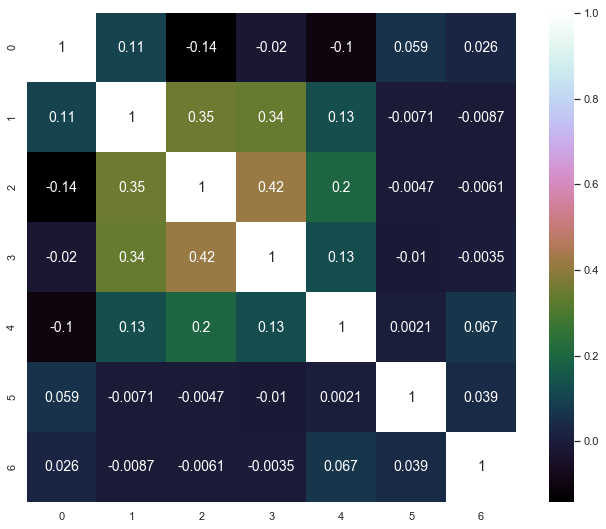

In [116]:
plt.figure(figsize=(12, 9))
sns.heatmap(cov_mat, cmap="cubehelix", annot=True, square=True, annot_kws={"size": 14}) # square: 정사각형 모양으로 출력

In [103]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("고유값: \n%s" % eig_vals) 
print("고유벡터: \n%s" % eig_vecs) 

고유값: 
[1.83017431 0.54823098 0.63363587 0.84548166 1.12659606 0.95598647
 1.06036136]
고유벡터: 
[[-0.08797699 -0.29189921  0.27784886  0.33637135  0.79752505  0.26786864
  -0.09438973]
 [ 0.50695734  0.30996609 -0.70780994  0.07393548  0.33180877  0.1101505
  -0.13499526]
 [ 0.5788351  -0.77736008 -0.00657105 -0.19677589 -0.10338032 -0.10336241
  -0.02293518]
 [ 0.54901653  0.45787675  0.63497294 -0.25170987  0.10388959 -0.01034922
  -0.10714981]
 [ 0.31354922  0.05287224  0.12200054  0.78782241 -0.28404472  0.04036861
   0.42547869]
 [-0.01930249  0.04433104 -0.03622859 -0.05762997  0.37489883 -0.8048393
   0.45245222]
 [ 0.00996933  0.00391698 -0.04873036 -0.39411153  0.10557298  0.50589173
   0.75836313]]


In [113]:
eig_pairs = [(eig_vals[i], eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs

[(1.830174313875499,
  array([-0.08797699,  0.50695734,  0.5788351 ,  0.54901653,  0.31354922,
         -0.01930249,  0.00996933])),
 (0.5482309765420602,
  array([-0.29189921,  0.30996609, -0.77736008,  0.45787675,  0.05287224,
          0.04433104,  0.00391698])),
 (0.633635874483021,
  array([ 0.27784886, -0.70780994, -0.00657105,  0.63497294,  0.12200054,
         -0.03622859, -0.04873036])),
 (0.8454816637143464,
  array([ 0.33637135,  0.07393548, -0.19677589, -0.25170987,  0.78782241,
         -0.05762997, -0.39411153])),
 (1.1265960639915473,
  array([ 0.79752505,  0.33180877, -0.10338032,  0.10388959, -0.28404472,
          0.37489883,  0.10557298])),
 (0.9559864740066265,
  array([ 0.26786864,  0.1101505 , -0.10336241, -0.01034922,  0.04036861,
         -0.8048393 ,  0.50589173])),
 (1.0603613622840846,
  array([-0.09438973, -0.13499526, -0.02293518, -0.10714981,  0.42547869,
          0.45245222,  0.75836313]))]

In [118]:
eig_pairs.sort(key=lambda x:x[0], reverse=True) # 0번째 값을 기준으로 정렬
eig_pairs

[(1.830174313875499,
  array([-0.08797699,  0.50695734,  0.5788351 ,  0.54901653,  0.31354922,
         -0.01930249,  0.00996933])),
 (1.1265960639915473,
  array([ 0.79752505,  0.33180877, -0.10338032,  0.10388959, -0.28404472,
          0.37489883,  0.10557298])),
 (1.0603613622840846,
  array([-0.09438973, -0.13499526, -0.02293518, -0.10714981,  0.42547869,
          0.45245222,  0.75836313])),
 (0.9559864740066265,
  array([ 0.26786864,  0.1101505 , -0.10336241, -0.01034922,  0.04036861,
         -0.8048393 ,  0.50589173])),
 (0.8454816637143464,
  array([ 0.33637135,  0.07393548, -0.19677589, -0.25170987,  0.78782241,
         -0.05762997, -0.39411153])),
 (0.633635874483021,
  array([ 0.27784886, -0.70780994, -0.00657105,  0.63497294,  0.12200054,
         -0.03622859, -0.04873036])),
 (0.5482309765420602,
  array([-0.29189921,  0.30996609, -0.77736008,  0.45787675,  0.05287224,
          0.04433104,  0.00391698]))]

In [120]:
for i in eig_pairs:
    print(i[0]) # eig_vals만 출력

1.830174313875499
1.1265960639915473
1.0603613622840846
0.9559864740066265
0.8454816637143464
0.633635874483021
0.5482309765420602


In [121]:
tot = sum(eig_vals)

In [122]:
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
var_exp

[26.143604201713195,
 16.093156465426482,
 15.147009525908112,
 13.656039104655914,
 12.077504207316458,
 9.051337561072025,
 7.831348933907803]

In [123]:
pca = PCA().fit(X_std)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [124]:
pca.explained_variance_ratio_

array([0.26143604, 0.16093156, 0.1514701 , 0.13656039, 0.12077504,
       0.09051338, 0.07831349])

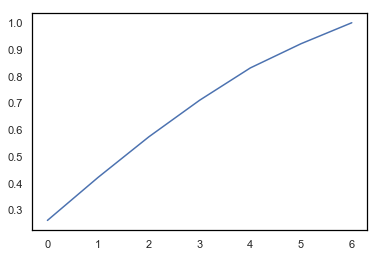

In [125]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # 누적합을 보고 몇 차원까지 줄일지 결정
# 1차원 줄이면 90% 데이터를 대표한다

In [126]:
sk_pca = PCA(n_components=6) # 7차원 → 6차원으로 축소
y_sk = sk_pca.fit_transform(X_std)
y_sk

array([[-1.90035018, -1.12083103, -0.0797787 ,  0.03228437, -0.07256447,
         0.06063013],
       [ 2.1358322 ,  0.2493369 ,  0.0936161 ,  0.50676925,  1.2487747 ,
        -0.61378158],
       [ 3.05891625, -1.68312693, -0.301682  , -0.4488635 , -1.12495888,
         0.29066929],
       ...,
       [-2.0507165 , -1.182032  , -0.04594506,  0.02441143, -0.01553247,
         0.24980658],
       [ 2.91418496, -1.42752606, -0.36333357, -0.31517759, -0.97107375,
         0.51444624],
       [-1.91543672, -1.17021407, -0.07024077,  0.01486762, -0.09545357,
         0.01773844]])

In [127]:
y_sk.shape

(14999, 6)